In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import os
os.chdir("..")


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from typing import Callable


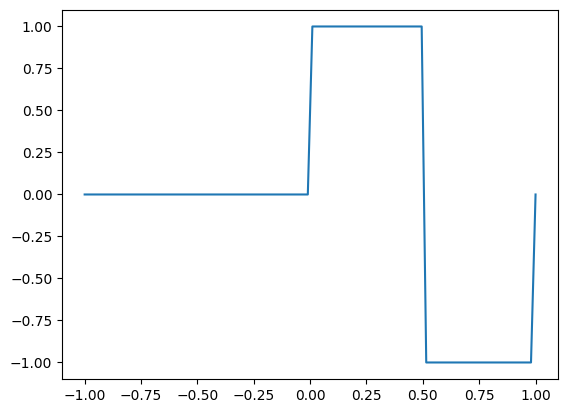

In [35]:
def haar(a, b, x):
    assert a > 0, f"parameter a must be positive a>0, but a={a} is given."
    t = (x - b) / a
    coef = 1 / np.sqrt(a)
    if 0 <= t < 0.5:
        return coef
    if 0.5 <= t < 1:
        return -1 * coef
    return 0

xs = np.linspace(-1, 1, 100)
ys = [
    haar(1, 0, x)
    for x in xs
]
plt.plot(xs, ys)


In [50]:
alist = 2 / 2 ** np.arange(4)

for a in alist:
    print("- "*20)
    print(f"a={a}")
    for b in np.arange(-1, 1, a):
        print(b)


- - - - - - - - - - - - - - - - - - - - 
a=2.0
-1.0
- - - - - - - - - - - - - - - - - - - - 
a=1.0
-1.0
0.0
- - - - - - - - - - - - - - - - - - - - 
a=0.5
-1.0
-0.5
0.0
0.5
- - - - - - - - - - - - - - - - - - - - 
a=0.25
-1.0
-0.75
-0.5
-0.25
0.0
0.25
0.5
0.75


In [80]:
def generate_wavelet_params(dim):
    return np.asarray(sum([
        [
            (a, b)
            for b in np.arange(-1, 1, a)
        ]
        for a in 2 / 2 ** np.arange(dim)
    ], []))
wparams = generate_wavelet_params(3)
print(wparams)


[[ 2.  -1. ]
 [ 1.  -1. ]
 [ 1.   0. ]
 [ 0.5 -1. ]
 [ 0.5 -0.5]
 [ 0.5  0. ]
 [ 0.5  0.5]]


In [66]:
def get_wavelet_range(a, b):
    return [b, a + b]


[0.   0.08 0.16 0.24 0.32 0.4  0.48 0.56 0.64 0.72 0.8  0.88 0.96 1.04
 1.12 1.2  1.28 1.36 1.44 1.52 1.6  1.68 1.76 1.84 1.92 2.   2.08 2.16
 2.24 2.32 2.4  2.48 2.56 2.64 2.72 2.8  2.88 2.96 3.04 3.12 3.2  3.28
 3.36 3.44 3.52 3.6  3.68 3.76 3.84 3.92 4.   4.08 4.16 4.24 4.32 4.4
 4.48 4.56 4.64 4.72 4.8  4.88 4.96 5.04 5.12 5.2  5.28 5.36 5.44 5.52
 5.6  5.68 5.76 5.84 5.92 6.   6.08 6.16 6.24 6.32 6.4  6.48 6.56 6.64
 6.72 6.8  6.88 6.96 7.04 7.12 7.2  7.28 7.36 7.44 7.52 7.6  7.68 7.76
 7.84 7.92 8.  ]
wavelet sum: -2.3272263052597304


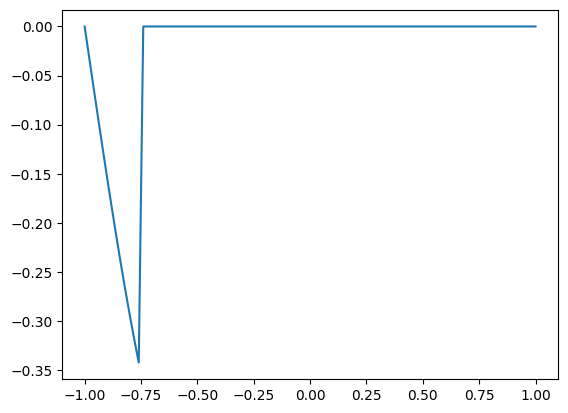

In [134]:
def np_haar(a, b, xs):
    shifted_xs = (xs - b) / a
    print(shifted_xs)
    yneg = np.where((-1 <= shifted_xs) & (shifted_xs < 0), -1, 0)
    ypos = np.where((0 <= shifted_xs) & (shifted_xs < 1), 1, 0)
    return (yneg + ypos) * np.sqrt(a)



xs = np.linspace(-1, 1, 101)
ys = np.sin(xs * np.pi)
wavelet = np_haar(0.25, -1, xs)
val = wavelet * ys
print("wavelet sum:", val.sum())
plt.plot(xs, val)
# plt.plot(xs, [haar(0.5, -1, x) for x in xs])


In [125]:
class Wavelet:

    def __init__(self):
        pass

    def get_pattern_applied_func(self, a: float, b: float) -> Callable:
        pass

    def calc_wavelet_params(self, dim):
        return sum([
            [
                (a, b)
                for b in np.arange(-1, 1, a)
            ]
            for a in 2 / 2 ** np.arange(dim)
        ], [])
    
    @staticmethod
    def get_wavelet_range(wavelet_param):
        a, b = wavelet_param
        return [b, a +b]


In [135]:
class Haar(Wavelet):

    def __init__(self):
        pass

    def get_pattern_applied_func(self, a: float, b: float, xs) -> Callable:
        shifted_xs = (xs - b) / a
        yneg = np.where((-1 <= shifted_xs) & (shifted_xs < 0), -1, 0)
        ypos = np.where((0 <= shifted_xs) & (shifted_xs < 1), 1, 0)
        return (yneg + ypos) * np.sqrt(a)


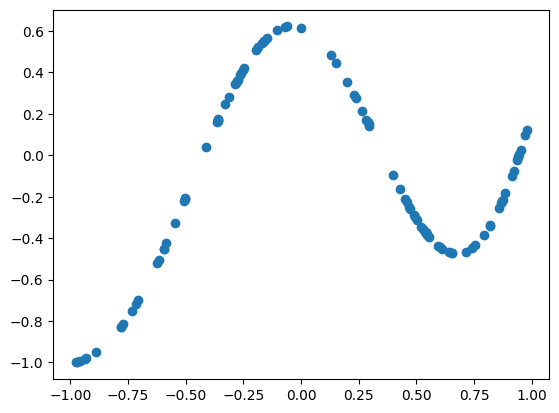

In [153]:
xs = np.random.uniform(-1, 1, 100)
xs = np.sort(xs)
ys = np.sin(xs) - 0.6 * np.sin(2 * xs) + 0.3 * np.cos(4 * xs)
ys /= np.max(np.abs(ys))

plt.scatter(xs, ys)


[-17.22330884  -4.340785    -3.49714847  -9.80437427  16.53935004
  -5.67148679  -7.66923386  -4.18767897   1.4426184    4.75549723
   0.74147371  -1.52054077  -1.71073894  -2.80510838   1.89798843]


<BarContainer object of 15 artists>

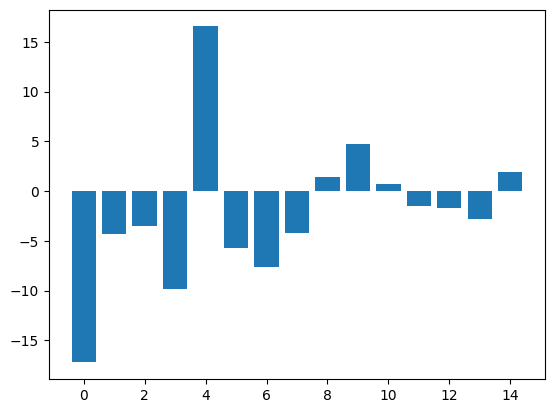

In [168]:
wavelet = Haar()
wparams = generate_wavelet_params(4)

wcoefs = np.asarray([
    np.sum(wavelet.get_pattern_applied_func(*wparam, xs) * ys)
    for wparam in wparams
])
print(wcoefs)

plt.bar(np.arange(len(wparams)), wcoefs, 0.8)


<BarContainer object of 15 artists>

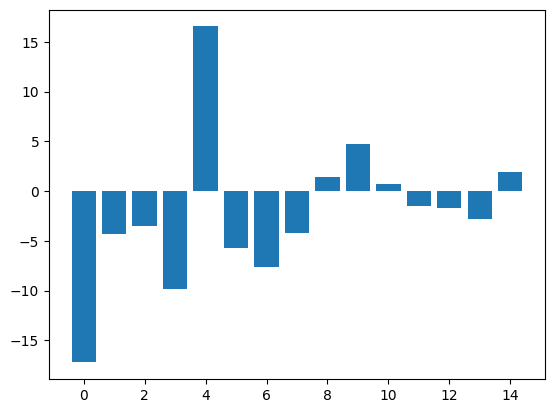

In [171]:
class WaveletTransform:

    def __init__(self, wavelet: Wavelet) -> None:
        self._wavelet = wavelet
    
    def transform(self, xs, ys, dim=4):
        xs = np.asarray(xs)
        ys = np.asarray(ys)
        wparams = generate_wavelet_params(dim)
        powers = np.asarray([
            np.sum(
                self._wavelet.get_pattern_applied_func(*wparam, xs) * ys
            )
            for wparam in wparams
        ])
        return powers

wt = WaveletTransform(wavelet)
powers = wt.transform(xs, ys, dim=4)
plt.bar(np.arange(len(powers)), powers, 0.8)
